# Exercise 4: Linear Regression

## Problem 1: Predicting SalePrice using GrLivArea

In [170]:
# Import the complete dataset "train.csv" into Jupyter
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.


#### --------- use standard ScatterPlot/JointPlot --------- 

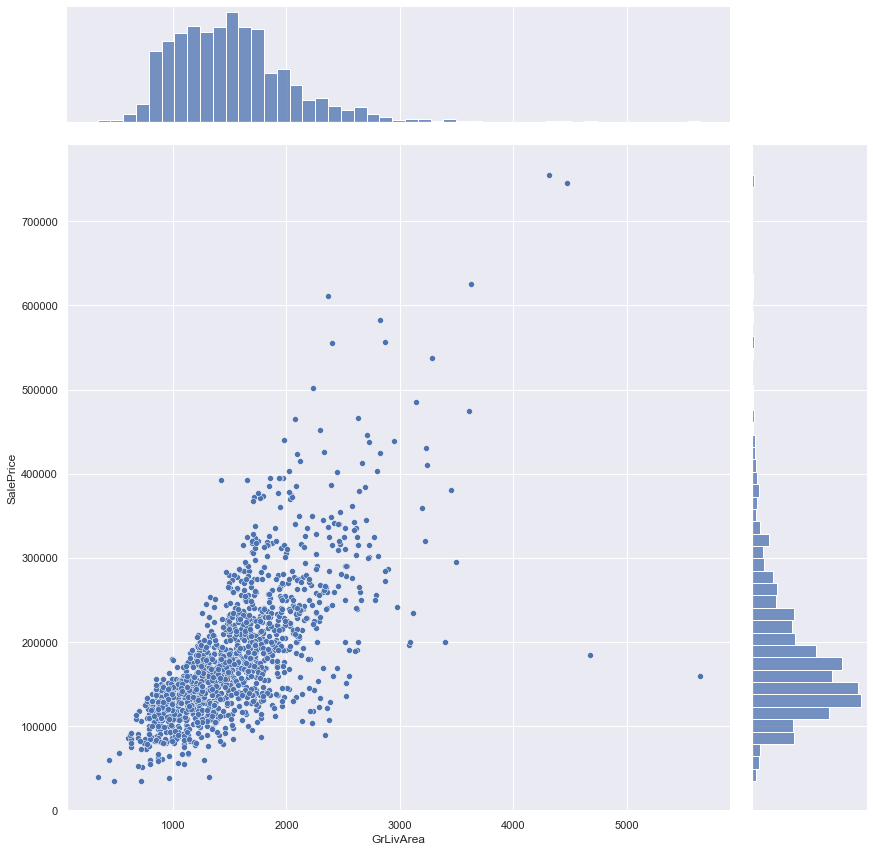

In [171]:
# Jointplot of SalePrice and GrLivArea
sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.


In [172]:
# Calculate the correlation between the two columns/variables
houseData.SalePrice.corr(houseData.GrLivArea)

# heatmap shows the decimal value of the comparison, hence a good way to get a numerical evidence of the relationship
# sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")


0.7086244776126522

### c) Import Linear Regression model from Scikit-Learn 

In [173]:
from sklearn.linear_model import LinearRegression

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [174]:
from sklearn.model_selection import train_test_split
# ------------------------------------------------------------------------------------------------------------------------ #
##### helps in partition but not at random
#### Train Set : 1100 samples
#### salePrice_train = pd.DataFrame(df_salePrice[:1100])
#### grLivArea_train = pd.DataFrame(df_grLivArea[:1100])

####  Test Set : 360 samples
####  salePrice_test = pd.DataFrame(df_salePrice[-360:])
####  grLivArea_test = pd.DataFrame(df_grLivArea[-360:])

# ------------------------------------------------------------------------------------------------------------------------ #
#### Split dataset into random train and test subsets
#### my answer but not as ideal as may not have a good split decimal if it was a different question
#### 0.246 to achieve 1100/360 split
#### houseData_train, houseData_test = train_test_split(houseData, test_size = 0.246)


#### Check the sample sizes
#### rint("Train Set :", houseData_train.shape)
#### print("Test Set  :", houseData_test.shape)

# ------------------------------------------------------------------------------------------------------------------------ #
## BETTER WAY TO SPLIT THE DATA (PROF ANSWER)
# Extract Response and Predictors
saleprice = pd.DataFrame(houseData['SalePrice'])
grlivearea = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into random Train and Test
grlivearea_train, grlivearea_test, saleprice_train, saleprice_test = train_test_split(grlivearea, saleprice, test_size = 360)

# Check the sample sizes
print("Train Set :", grlivearea_train.shape, saleprice_train.shape)
print("Test Set  :", grlivearea_test.shape, saleprice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

In [175]:
# Create a Linear Regression object
linreg = LinearRegression()

# format: (predictor, response)
linreg.fit(grlivearea_train, saleprice_train)

LinearRegression()

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.


Intercept of Regression 	: b =  [13804.1420625]
Coefficients of Regression 	: a =  [[110.99716335]]



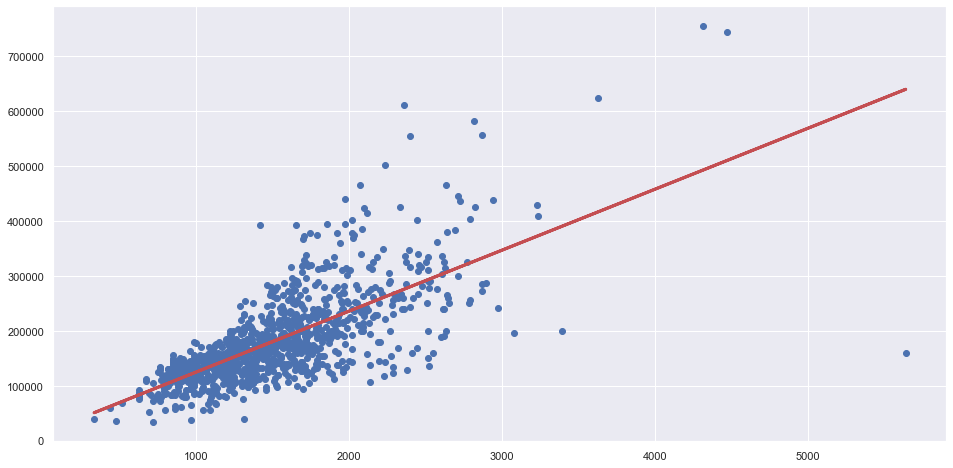

In [176]:
# Formula for the Regression line
regline_x = grlivearea_train
regline_y = linreg.intercept_ + linreg.coef_ * grlivearea_train

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(grlivearea_train, saleprice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.


In [177]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
# Check how good the predictions are on the Train Set.
print("Goodness of Fit of Model \tTrain Dataset")
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(grlivearea_train, saleprice_train))

# Predict the response on the train set
saleprice_train_pred = linreg.predict(grlivearea_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(saleprice_train, saleprice_train_pred))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5078164760257863
Mean Squared Error (MSE) 	: 3172734367.5028677


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.


In [178]:
saleprice_test_pred = linreg.predict(grlivearea_test)

### i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy.


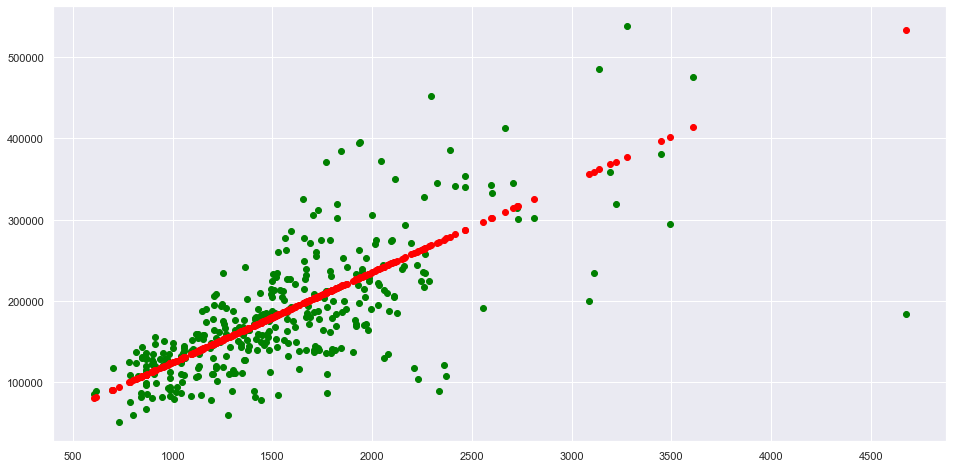

In [179]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivearea_test, saleprice_test, color = "green")
plt.scatter(grlivearea_test, saleprice_test_pred, color = "red")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training

In [180]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(grlivearea_test, saleprice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(saleprice_test, saleprice_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4793879233895043
Mean Squared Error (MSE) 	: 3060939070.473503



-------------------------------------------------------------------------------------------- End of Problem 1 --------------------------------------------------------------------------------------------

## Problem 2 : Predicting SalePrice using Other Variables

Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” one-by-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

### Predicting SalePrice using LotArea

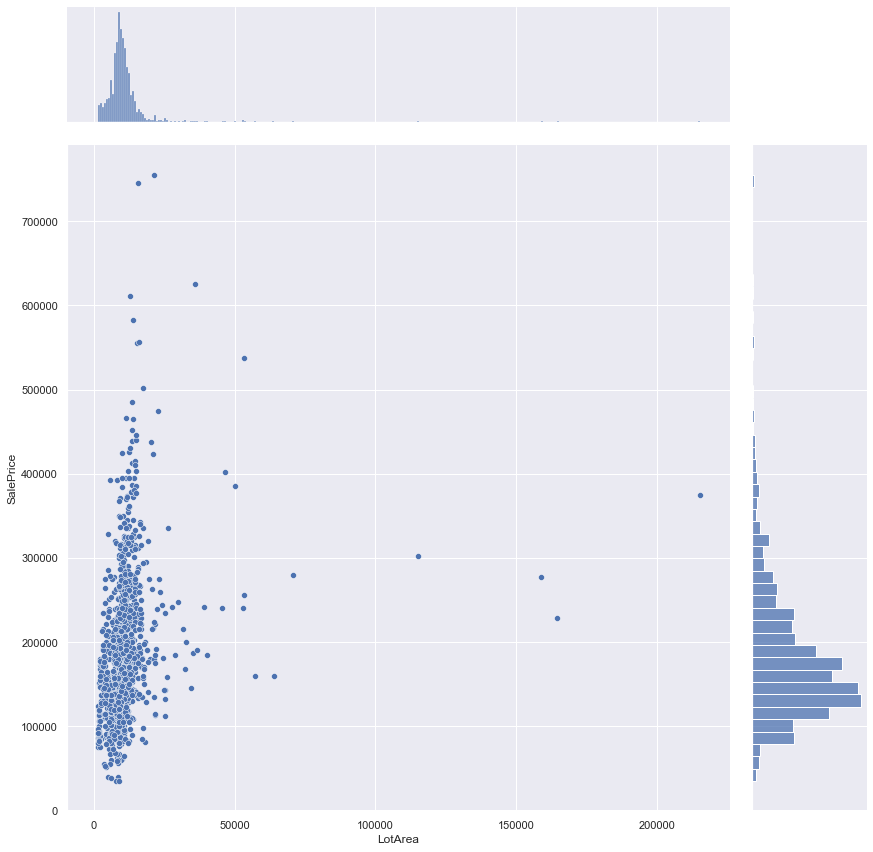

In [181]:
sb.jointplot(data = houseData, x = "LotArea", y = "SalePrice", height = 12)

In [182]:
houseData.SalePrice.corr(houseData.LotArea)

0.26384335387140573

#### Linear Regression on SalePrice vs Predictor

In [183]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['LotArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [184]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [154821.95154228]
Coefficients 	: a =  [[2.53905978]]


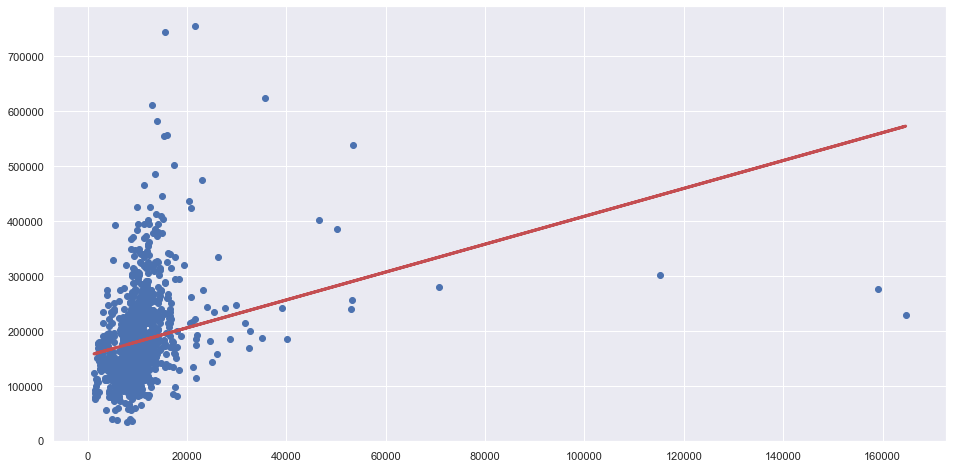

In [185]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [186]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.0793625481789424
Mean Squared Error (MSE) 	: 6130223765.827704


#### Prediction of Response based on the Predictor

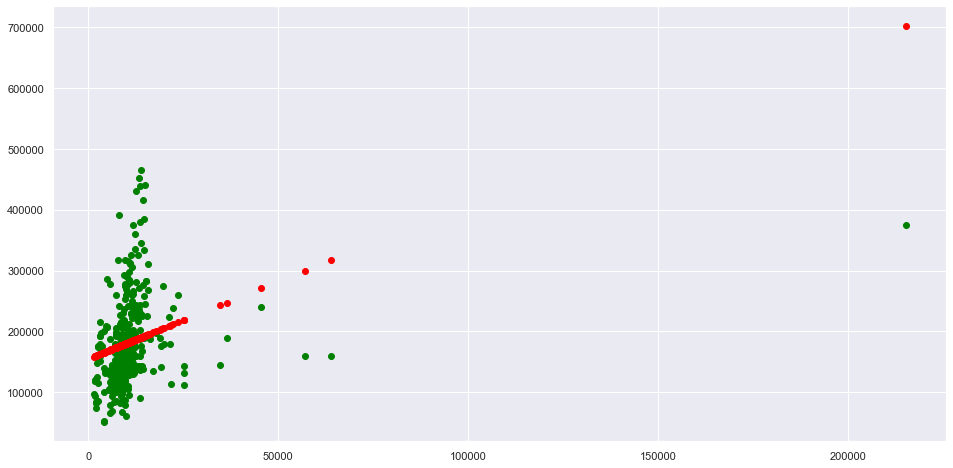

In [187]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [188]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 5145077348.317519


## REPEAT FOR TotalBsmtSF, GarageArea 

-------------------------------------------------------------------------------------------- End of Problem 2 --------------------------------------------------------------------------------------------

## Problem 3 : Best Uni-Variate Model to Predict SalePrice

Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

In [189]:
predictors = ["SalePrice", "GrLivArea", "LotArea", "TotalBsmtSF", "GarageArea"]
for predictor in predictors:
    
    if predictor == "SalePrice":
        print("------------------ SalePrice (for comparison purposes) ------------------")
        print()
    else:
        print("-------------------------------", predictor, "-------------------------------")
        print()
    
    houseData_train, houseData_test = train_test_split(houseData, test_size = 0.246)

    # Create a Linear Regression object
    linreg = LinearRegression()
    # Obtain SP and predictor from the training data
    salePrice3_train = pd.DataFrame(houseData_train['SalePrice'])
    predictor2_train = pd.DataFrame(houseData_train[predictor])
    # Train the linear regression model on the train dataset
    # (predictor, response)
    linreg.fit(predictor2_train, salePrice3_train)

    
    # Predict Total values corresponding to HP
    salePrice3_train_pred = linreg.predict(predictor2_train)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predictor2_train, salePrice3_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(salePrice3_train, salePrice3_train_pred))
    print()

    predictor2_test = pd.DataFrame(houseData_test[predictor])
    salePrice3_test = pd.DataFrame(houseData_test['SalePrice'])
    salePrice3_test_pred = linreg.predict(predictor2_test)
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predictor2_test, salePrice3_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(salePrice3_test, salePrice3_test_pred))
    print()
    
    # accuracy of prediction on Test Data
    accuracy = linreg.score(predictor2_test,salePrice3_test)
    print("\t Accuracy Score \t:", accuracy*100,'%')
    print()

------------------ SalePrice (for comparison purposes) ------------------

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.4423142270604618e-21

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.3864282338044347e-21

	 Accuracy Score 	: 100.0 %

------------------------------- GrLivArea -------------------------------

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5046980561384753
Mean Squared Error (MSE) 	: 3190605781.7034216

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4919590461815265
Mean Squared Error (MSE) 	: 2992762884.2373934

	 Accuracy Score 	: 49.19590461815265 %

------------------------------- LotArea -------------------------------

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05966577060846223
Mean Squared Error (MSE) 	: 5610960486.793163

Goodness of Fit of Model 	Test Dataset
Explained Varianc

#### As compared to the rest, GrLivArea has highest R^2, lowest MSE (for both train and test datasets), and highest Accuracy Score, therefore, making it the best predictor out of the 4 models.

# -------------------------------------------------------------------------------
#### Prof's answer to Problem 3
Compare and contrast the four models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SalePrice` vs `GrLivArea` has the best Explained Variance (R^2) out of the four models.   
* `SalePrice` vs `LotArea` has the worst Explained Variance (R^2) out of the four models.   
* Naturally, the model with `GrLivArea` is the best one in terms of just the Training accuracy.    


* We also find `SalePrice` vs `GrLivArea` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `SalePrice` vs `LotArea` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `GrLivArea` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `GrLivArea` is the best amongst the four in predicting `SalePrice`.      

**Did you notice?** : Go back and check again the R^2 and MSE values for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of R^2 and MSE values. If that is so, can we *really* be confident that `GrLivArea` will always be the best variable to predict `SalePrice`? Think about it. ;-)

-------------------------------------------------------------------------------------------- End of Problem 3 --------------------------------------------------------------------------------------------

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression. 

In [190]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (1100, 4) (1100, 1)
Test Set  : (360, 4) (360, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [191]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-12932.86449616]
Coefficients 	: a =  [[ 63.46336866  -0.1414415   44.3448288  107.44340645]]


#### Prediction of Response based on the Predictor

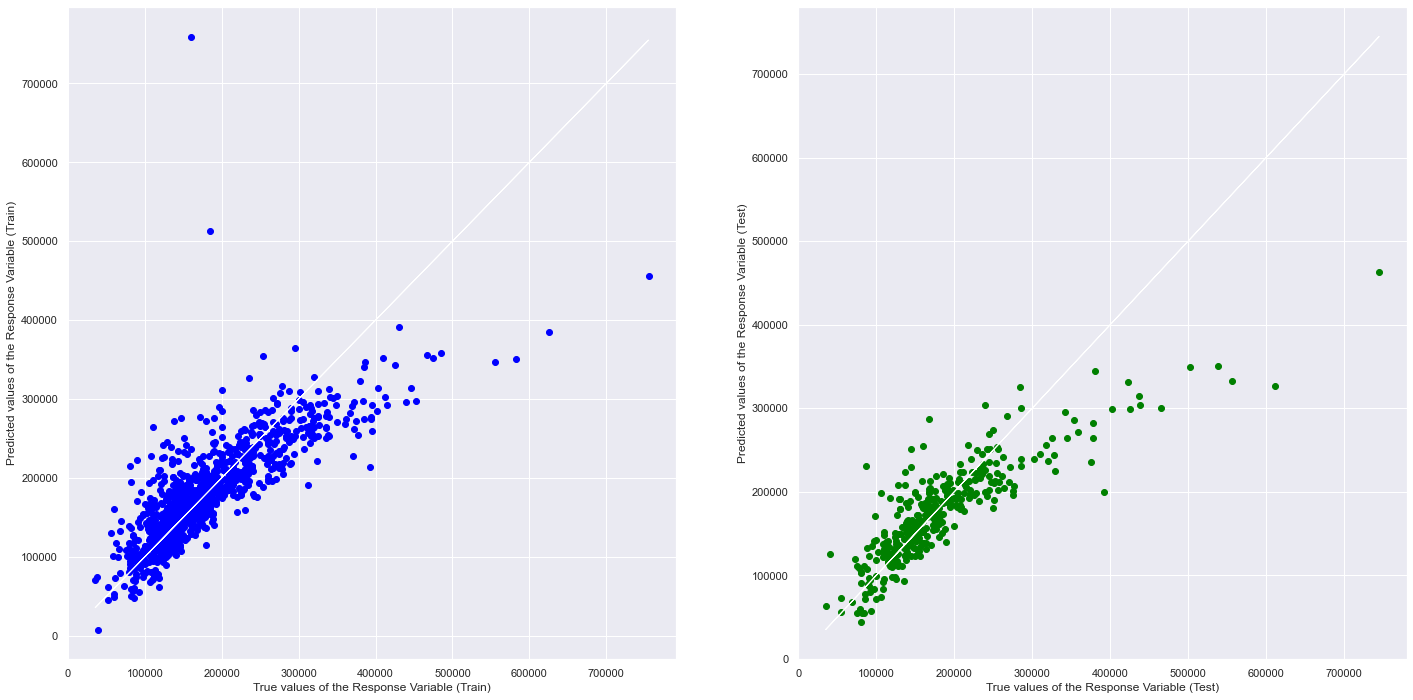

In [192]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [193]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6429026683548198
Mean Squared Error (MSE) on Train Set 	: 2120535844.7543688
Mean Squared Error (MSE) on Test Set 	: 2270286462.465258


**Observation** : The model with `SalePrice` against all the four variables `GrLivArea`, `LotArea`, `TotalBsmtSF`, `GarageArea` is definitely better!